In [155]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [156]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [157]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [158]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [159]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [160]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [161]:
# Save references to each table
mm=Base.classes.measurement
sta=Base.classes.station

In [162]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [163]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(mm.tobs), func.avg(mm.tobs), func.max(mm.tobs)).filter(mm.date >= start_date).filter(mm.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [164]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
temps=calc_temps('2016-08-01','2017-08-01')

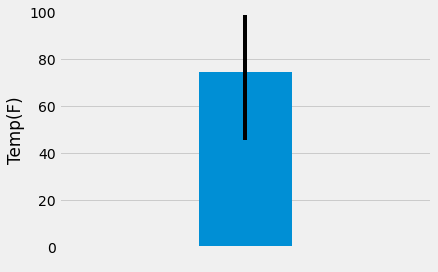

In [165]:
# Plot the results from your previous query as a bar chart.
fig, ax = plt.subplots()
ax.bar(x=' ',width=10,height=temps[0][1],yerr=temps[0][2]-temps[0][0])
plt.xlim(-20,20)
plt.ylim(0,100) 
plt.tight_layout()
plt.ylabel('Temp(F)')
plt.show()
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

### Daily Rainfall Average

In [166]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rain=session.query(mm.station,func.sum(mm.prcp)).group_by(mm.station).filter(mm.date>'2016-08-01').filter(mm.date< '2017-08-01').order_by(func.sum(mm.prcp).desc())
for i in total_rain:
    print(i)

('USC00516128', 155.70000000000005)
('USC00519281', 75.96000000000002)
('USC00513117', 52.040000000000035)
('USC00519523', 39.260000000000005)
('USC00514830', 34.13999999999999)
('USC00519397', 17.09999999999999)
('USC00517948', 4.77)


In [167]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(mm.tobs), func.avg(mm.tobs), func.max(mm.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", mm.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [168]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'
normals=[]
# Use the start and end date to create a range of dates
# Strip off the year and save a list of strings in the format %m-%d
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

for i in range(7):
    date='08-0'+str(i+1)
    data=list(daily_normals(date)[0])
    normals.append(data)

In [169]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
for i in range(7):
    date='08-0'+str(i+1)
    normals[i].insert(0,date)

df=pd.DataFrame(normals,columns=['trip_dates','tmin','tavg','tmax'])
df

,trip_dates,tmin,tavg,tmax
0,08-01,67.0,75.540000,83.0
1,08-02,68.0,75.603774,84.0
2,08-03,70.0,76.611111,85.0
3,08-04,69.0,76.711538,84.0
4,08-05,69.0,76.148148,82.0
5,08-06,67.0,76.250000,83.0
6,08-07,71.0,77.156863,83.0


<AxesSubplot:>

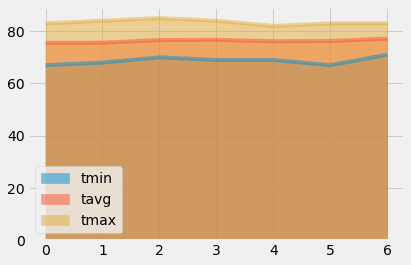

In [170]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind='area',stacked=False)

## Close Session

In [171]:
session.close()